# Authored by Nathan Young, Angela Xiao, Siyuan Fan

In [133]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

I will use the probability $2\frac{ln(n)}{n}$ as this almost always yields a connected graph.

In [140]:
n = 100
G = nx.erdos_renyi_graph(n,  2*np.log(n)/n, seed=123, directed=False)
M = nx.to_numpy_matrix(G)

We will then show the graph we just created.

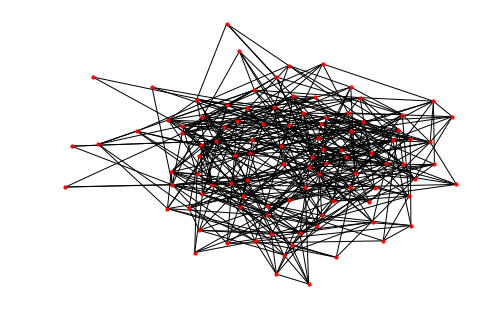

In [141]:
nx.draw(G, node_size=10)
plt.show()


In [142]:
np.matrix.view(M)
print(G.nodes)
print(len(G.edges))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
462


The code below will create data for the distances. We note that each node is denoted by a number, and that we check all triplets of nodes in our graph, check if they have edges between them, then check the corresponding "triangle" that they make such that it satisfies the triangle inequality.

In [143]:
def createDistances(G):
    while True:
        x = np.random.permutation(10*n)
        y = np.random.permutation(10*n)
        for i in range(n):
                for j in range(n):
                    if G.has_edge(i,j):
                        G[i][j]['weight'] = (int)(np.sqrt((x[i]-x[j])**2+(y[i]-y[j])**2))
        if checkMetric(G): break
                            
def checkMetric(G):
        for i in range(n):
            for j in range(n):
                for k in range(n):
                    if G.has_edge(i,j) and G.has_edge(j,k) and G.has_edge(k,i) and i != j and j != k and k != i:
                        ij = G[i][j]['weight']
                        jk = G[j][k]['weight']
                        ki = G[k][i]['weight']
                        if not ((ij <= jk + ki) and (jk <= ij + ki) and (ki <= ij + jk)):
                            return False
        return True
                            
createDistances(G)
print(checkMetric(G))

True


We then show the distances for each edge.

In [144]:

list(G.edges(data=True))
W = [[G[i][j]['weight'] if G.has_edge(i,j) and G[i][j] else 'x' for j in range(n)] for i in range(n)]
print(W)

[['x', 292, 818, 'x', 'x', 'x', 921, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 468, 'x', 490, 'x', 309, 'x', 'x', 'x', 'x', 'x', 'x', 496, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 351, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 867, 'x', 'x', 'x', 'x', 680, 'x', 279, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 433, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 708, 'x', 1052, 'x', 388, 'x', 1019, 'x', 'x', 'x', 'x'], [292, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 203, 'x', 337, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 325, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 800, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 719, 'x', 'x', 'x', 'x', 'x', 'x', 446, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 472, 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x',

In [149]:
print(n)
print(int(n/2))
print(' '.join(str(s+1) for s in range(n)))
print(' '.join(str(s+1) for s in range(1,101)))
print(1)
for i in range(n):
        print(' '.join(str(n) for n in W[i]))

100
50
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100
2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101
1
x 292 818 x x x 921 x x x x x x x 468 x 490 x 309 x x x x x x 496 x x x x x x x x x x x x x x x x x x x x x x 351 x x x x x x x x 867 x x x x 680 x 279 x x x x x x x x x x x x x x x 433 x x x x x x x x 708 x 1052 x 388 x 1019 x x x x
292 x x x x x x x x x x x x x 203 x 337 x x x x x x x x x x x x x 325 x x x x x x x x x 800 x x x x x x x x x x x x x x x 719 x x x x x x 446 x x x x x x x x x x x x x x x